In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import unidecode
import nltk

SEED = 42

np.random.seed(SEED)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/defive/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/defive/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/defive/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/defive/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/defive/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

True

# Inicializando as stopwords, tokenizador e estemizador.

In [57]:
from string import punctuation
from nltk import tokenize

tokenizer = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

stopwords = [unidecode.unidecode(stopword) for stopword in nltk.corpus.stopwords.words('portuguese')]
punctuations = [ponct for ponct in punctuation]
personlized_punctuations = ['),', '",', '".']
useless_words = list(stopwords + punctuations + personlized_punctuations)

# Primeiro dataset

In [58]:
data = pd.read_csv('./datasets/kaggle_diogo_caliman_historico_materias.csv')
data_nafilled = data.fillna('unknow')

# Filtrando notícias sem tratamento nos dados

In [59]:
crime = data_nafilled.query('conteudo_noticia.str.contains("crime")', engine='python')
preso = data_nafilled.query('conteudo_noticia.str.contains("preso")', engine='python')
drogas = data_nafilled.query('conteudo_noticia.str.contains("drogas")', engine='python')

crime_sem_drogas_preso = crime[~crime.isin(drogas) | ~crime.isin(preso)]
preso_sem_crime_drogas = preso[~preso.isin(crime) | ~preso.isin(drogas)]
drogas_sem_crime_preso = drogas[~drogas.isin(crime) | ~drogas.isin(preso)]

In [60]:
print("Notícias que contém a palavra crime: %d \n" % crime.shape[0])
print("Notícias que contém a palavra preso: %d \n" % preso.shape[0])
print("Notícias que contém a palavra drogas: %d \n" % drogas.shape[0])
print("Total de dados: %d \n" % (crime.shape[0]+ preso.shape[0]+ drogas.shape[0]))
print("Notícias que contém a palavra crime mas não tem drogas ou preso: %d \n" % crime_sem_drogas_preso.shape[0])
print("Notícias que contém a palavra preso mas não tem crime ou drogas: %d \n" % preso_sem_crime_drogas.shape[0])
print("Notícias que contém a palavra drogas mas não tem crime ou preso: %d \n" % drogas_sem_crime_preso.shape[0])

Notícias que contém a palavra crime: 455 

Notícias que contém a palavra preso: 370 

Notícias que contém a palavra drogas: 60 

Total de dados: 885 

Notícias que contém a palavra crime mas não tem drogas ou preso: 455 

Notícias que contém a palavra preso mas não tem crime ou drogas: 370 

Notícias que contém a palavra drogas mas não tem crime ou preso: 60 



In [61]:
data = pd.concat([crime,preso,drogas])

In [62]:
drogas.assunto.unique()

array(['esportes', 'politica', 'economia', 'famosos', 'tecnologia'],
      dtype=object)

# Tratando os dados

# Cria função de visualização das palavras mais usadas em um dataset qualquer

In [63]:
def pareto(texts, column, quantity):
    phrase = ' '.join([texto for texto in texts[column]])
    tokens = tokenizer.tokenize(phrase)
    frequency = nltk.FreqDist(tokens)
    frequency_dataframe = pd.DataFrame({"Palavra": list(frequency.keys()), "Frequência": list(frequency.values())})
    frequency_dataframe = frequency_dataframe.nlargest(columns = "Frequência", n = quantity)

    plt.figure(figsize=(15,10))
    plt.xticks(rotation=90)
    ax = sns.barplot(data = frequency_dataframe, x = "Palavra", y = "Frequência")
    ax.set(ylabel = "Contagem")
    plt.show()

# Cria função de pegar dados filtrados

In [64]:
def get_contains(dataset, colum, content):
    return dataset.query('{}.str.contains("{}")'.format(colum, content), engine='python')

# Crianção de uma função geral de normalização dos dados

In [65]:
def normalize(dataframe, column):
    phrase_stopwords_removeds = list()

    for text in dataframe[column]:
        phrase = list()
        tokens = tokenizer.tokenize(unidecode.unidecode(str(text).lower()))
        
        for token in tokens:
            if token not in useless_words:
                phrase.append(stemmer.stem(token))
        phrase_stopwords_removeds.append(' '.join(phrase))
        
    return phrase_stopwords_removeds

# Normalizando dados

In [66]:
data['normalized'] = normalize(data, 'conteudo_noticia')

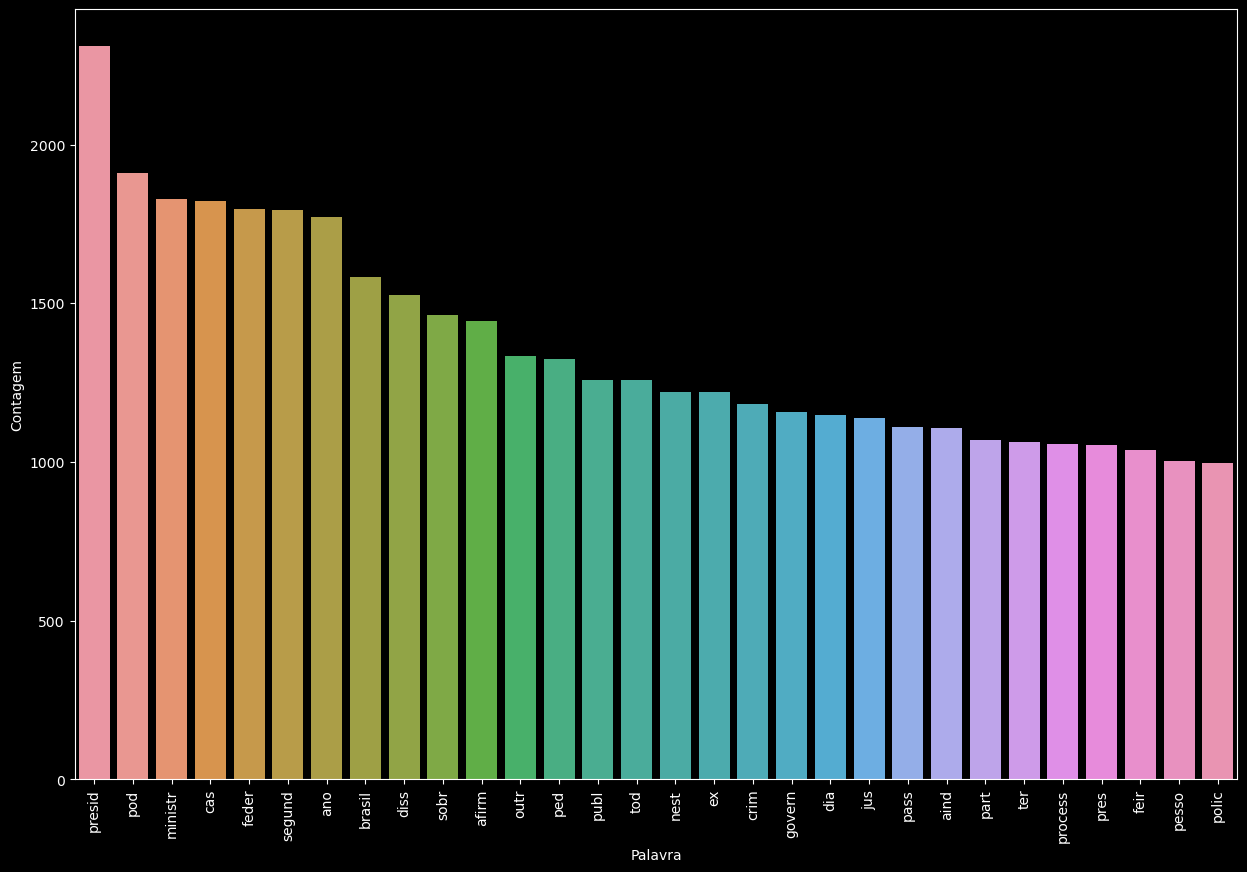

In [67]:
pareto(data, 'normalized', 30)

# Carregando segundo dataset

In [75]:
data_folhasp = pd.read_csv('./datasets/kaggle_marlesson_noticias_folha_sp.csv')
data_folhasp = data_folhasp.fillna('unknow')

In [72]:
print(data_folhasp.category.value_counts())

poder                           22022
colunas                         21622
mercado                         20970
esporte                         19730
mundo                           17130
cotidiano                       16967
ilustrada                       16345
opiniao                          4525
paineldoleitor                   4011
saopaulo                         3955
tec                              2260
tv                               2142
educacao                         2118
turismo                          1903
ilustrissima                     1411
ciencia                          1335
equilibrioesaude                 1312
sobretudo                        1057
bbc                               980
folhinha                          876
empreendedorsocial                841
comida                            828
asmais                            548
ambiente                          491
seminariosfolha                   379
serafina                          334
o-melhor-de-

In [69]:
data_folhasp.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,unknow,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,unknow,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,unknow,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,unknow,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,unknow,http://www1.folha.uol.com.br/mercado/2017/10/1...


In [76]:
data_folhasp['normalized'] = normalize(data_folhasp, 'text')

In [79]:
data_folhasp.normalized[0]

"possibil condenaca imped candidat 2018 ex presid luiz inaci lul silv fez nest segund 9 discurs inflam contr lav jat diss sab lasc exig ped desculp juiz sergi mor afirm disput planalt cab eleitor express sucessa michel tem segund petist reu set aco penal obje mor imped candidat ano vem desidrat inclusiv apoi nom altern ex prefeit paul fern haddad pt cas poss concorr presidenc sei to lasc tod dia process quer mor absolv quer pec desculp diss lul dur seminari sobr educaca brasil investig cheg diz ah lul candidat vai ter forc cab eleitor '. test complet petist ex presid mor usou ment cont polic feder ministeri publ julg lo conden lo nov ano seil mes prisa cas triplex guaruj sp ). ex presid diss aind ter med investig acord acostum mex deput sen tem apuraco quer saib seguint acostum lid deput med mex sen med quer diz respeit profund respeit lei ajud cri respeit respeit respeit afirm petist acord ali lul gost discut bast chanc candidat planalt projeca nom haddad plan b pt incomod prox ex pre

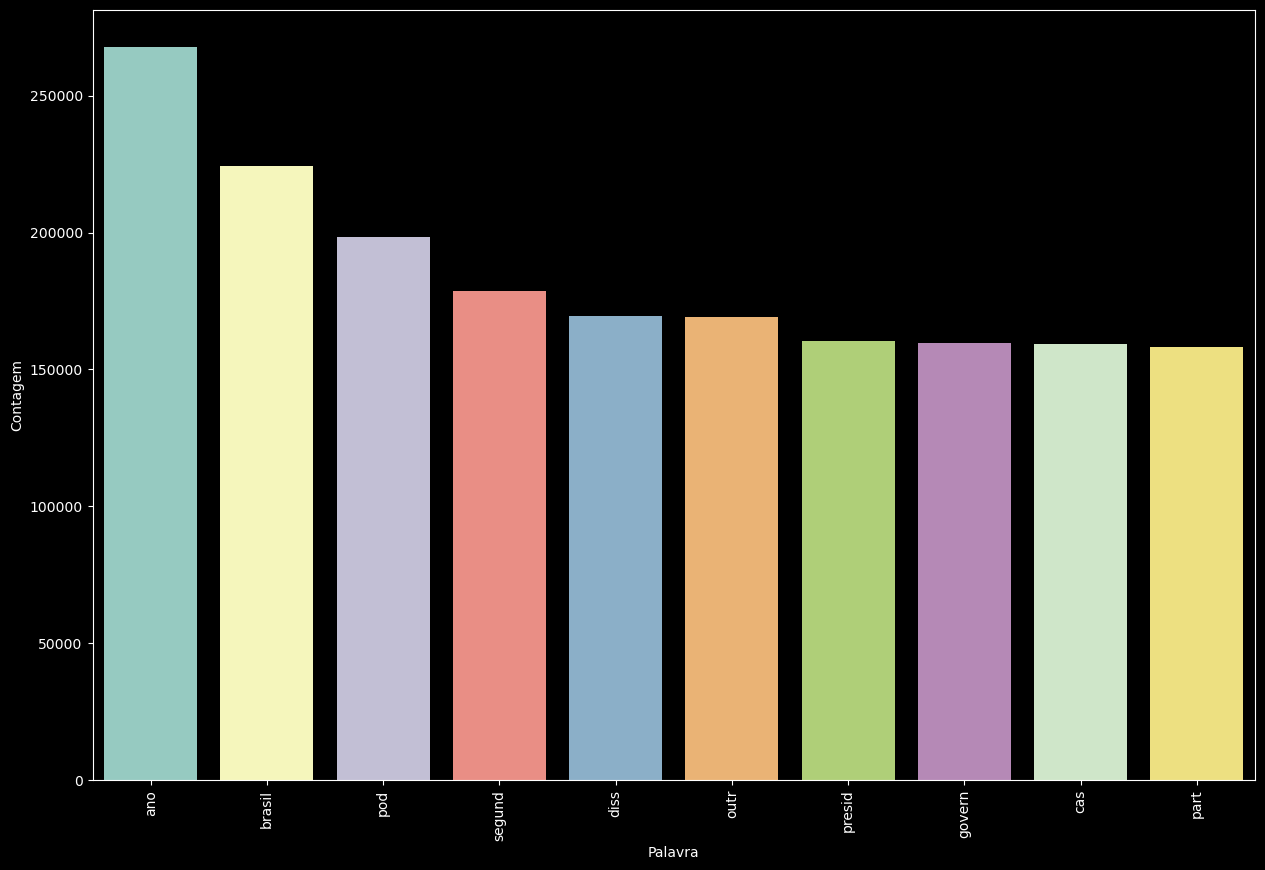

In [81]:
pareto(data_folhasp, 'normalized', 10)

In [117]:
from wordcloud import WordCloud


def print_wordcloud(dataset, category, column):
    filtered_text = dataset.query('category == "{}"'.format(category))
    phrase = ' '.join([texto for texto in filtered_text[column]])

    wc = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(phrase)
    plt.figure(figsize=(10,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [99]:
data_folhasp.category.unique()

array(['poder', 'ilustrada', 'mercado', 'mundo', 'esporte', 'tec',
       'cotidiano', 'ambiente', 'equilibrioesaude', 'sobretudo',
       'colunas', 'educacao', 'tv', 'banco-de-dados', 'opiniao',
       'ciencia', 'paineldoleitor', 'saopaulo', 'ilustrissima',
       'seminariosfolha', 'turismo', 'empreendedorsocial', 'serafina',
       'asmais', 'o-melhor-de-sao-paulo', 'bbc', 'comida', 'musica',
       'folhinha', 'especial', 'treinamento', 'multimidia',
       'cenarios-2017', 'topofmind', 'dw', 'ombudsman', 'contas-de-casa',
       'mulher', '2016', 'guia-de-livros-discos-filmes',
       'treinamentocienciaesaude', 'rfi', 'vice', 'bichos', 'euronews',
       'guia-de-livros-filmes-discos', 'infograficos', '2015'],
      dtype=object)

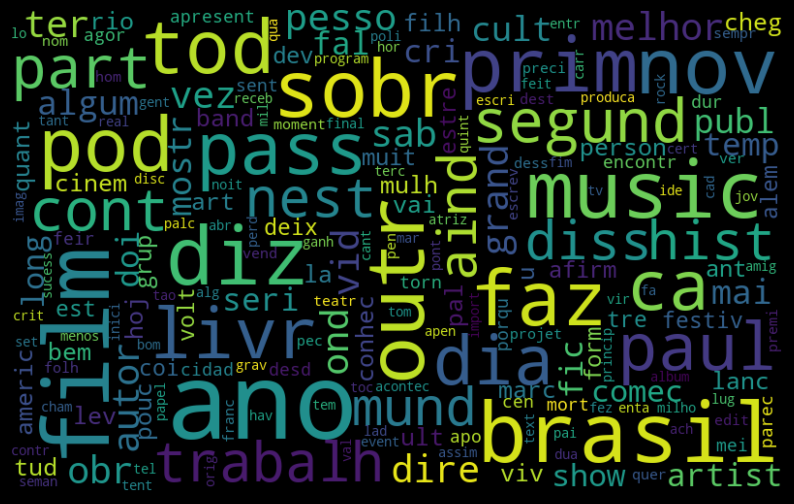

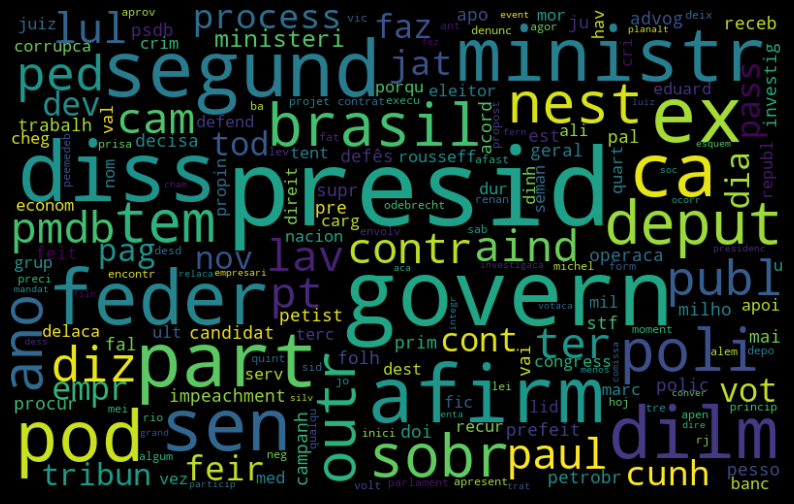

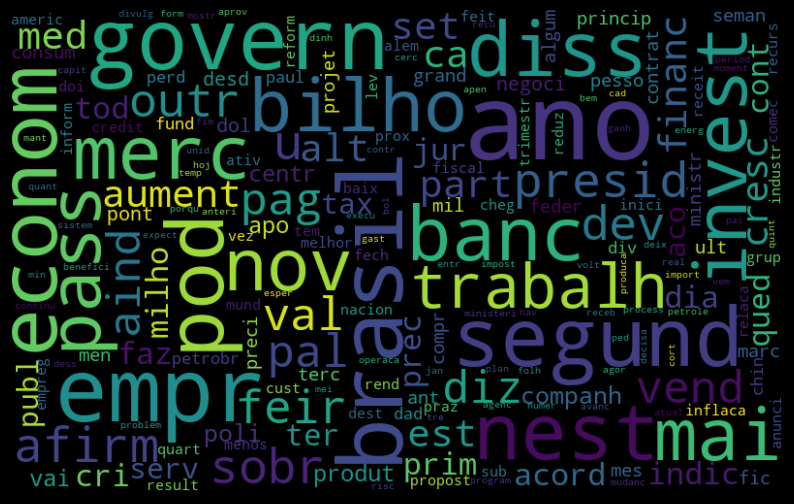

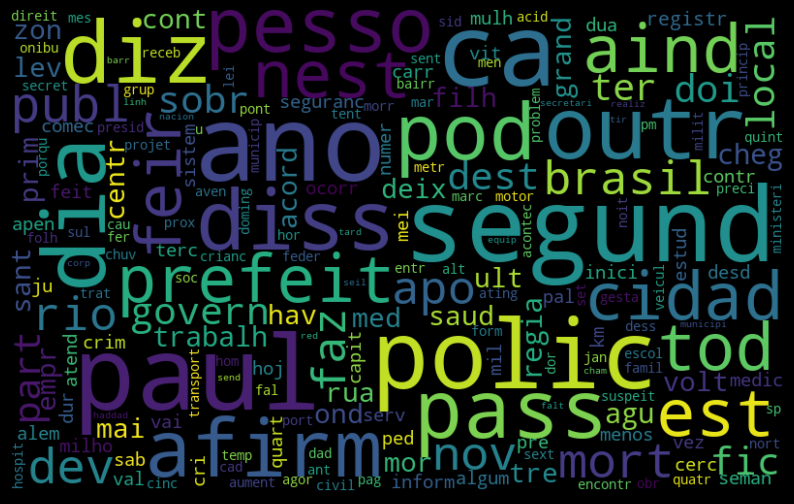

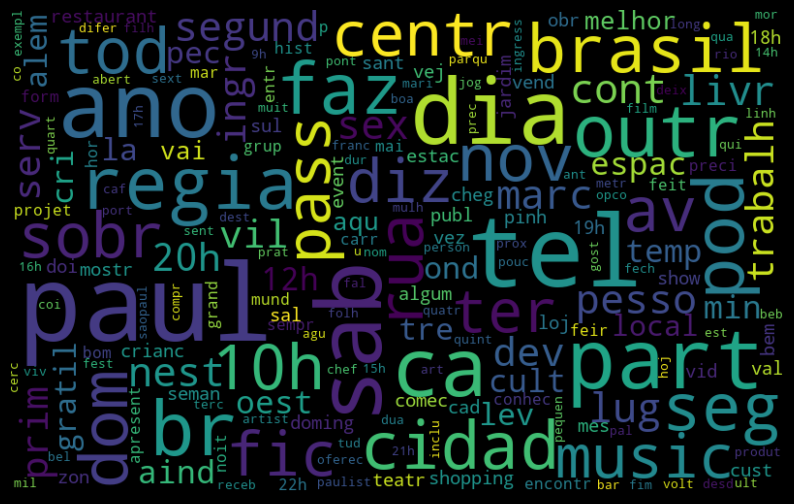

In [118]:
print_wordcloud(data_folhasp, 'ilustrada', 'normalized')
print_wordcloud(data_folhasp, 'poder', 'normalized')
print_wordcloud(data_folhasp, 'mercado', 'normalized')
print_wordcloud(data_folhasp, 'cotidiano', 'normalized')
print_wordcloud(data_folhasp, 'saopaulo', 'normalized')